# Corner

A corner is a point whose local neighborhood stands in two dominant and different edge directions.

There are various corner detection algorithms

1. Harris corner detection: 
2. shi-tomasi corner detection: It changes the scoring function selection criteria that Harris uses for corner

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
flat_chess = cv2.imread("../DATA/flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

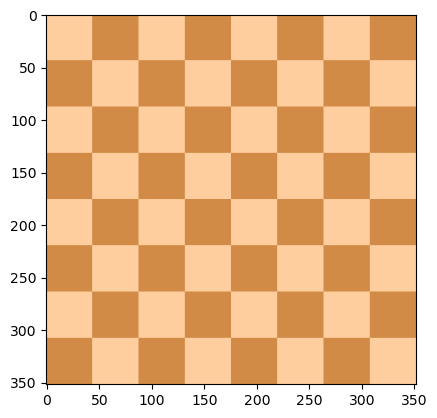

In [3]:
plt.imshow(flat_chess)

In [4]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

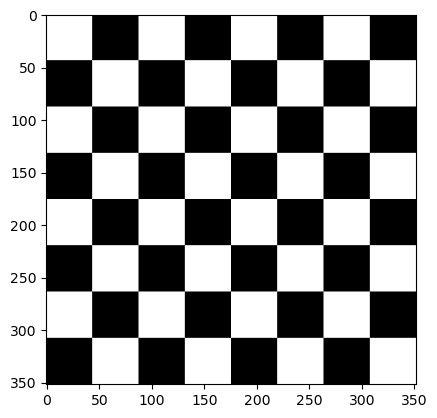

In [6]:
plt.imshow(gray_flat_chess, cmap="gray")

In [7]:
real_chess = cv2.imread("../DATA/real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

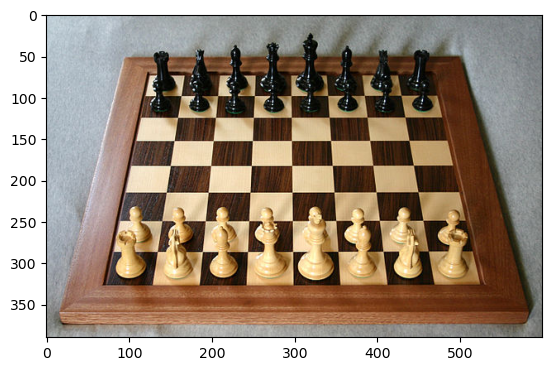

In [8]:
plt.imshow(real_chess)

In [9]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)

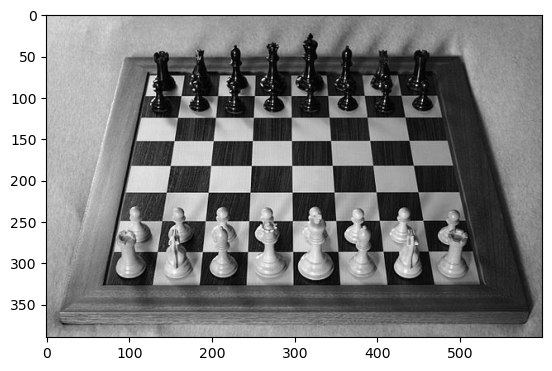

In [10]:
plt.imshow(gray_real_chess, cmap="gray")

In [11]:
gray = np.float32(gray_flat_chess)

In [12]:
gray

array([[197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       ...,
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.]],
      shape=(352, 352), dtype=float32)

In [13]:
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

In [14]:
dst = cv2.dilate(dst, None)

In [15]:
flat_chess[dst>0.01*dst.max()] = [255, 0, 0] # RGB

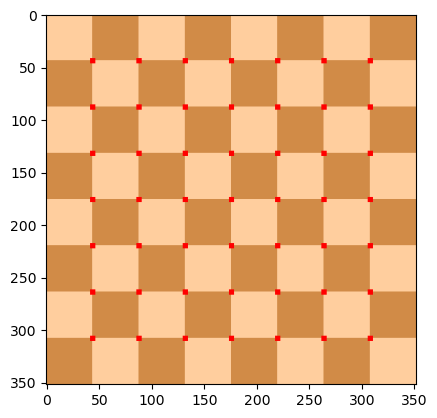

In [16]:
plt.imshow(flat_chess)

In [17]:
gray = np.float32(gray_real_chess)

dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

In [18]:
dst = cv2.dilate(dst, None)

In [19]:
real_chess[dst > 0.01*dst.max()] = [255, 0, 0]

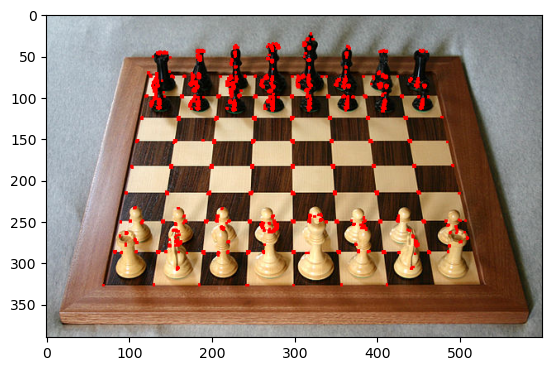

In [20]:
plt.imshow(real_chess)

# Shi-Tomasi

In [21]:
real_chess = cv2.imread("../DATA/real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

flat_chess = cv2.imread("../DATA/flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)

In [32]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess, 64, 0.01, 10)

In [33]:
corners

array([[[308., 308.]],

       [[264., 308.]],

       [[220., 308.]],

       [[176., 308.]],

       [[132., 308.]],

       [[ 88., 308.]],

       [[ 44., 308.]],

       [[308., 264.]],

       [[264., 264.]],

       [[220., 264.]],

       [[176., 264.]],

       [[132., 264.]],

       [[ 88., 264.]],

       [[ 44., 264.]],

       [[308., 220.]],

       [[264., 220.]],

       [[220., 220.]],

       [[176., 220.]],

       [[132., 220.]],

       [[ 88., 220.]],

       [[ 44., 220.]],

       [[308., 176.]],

       [[264., 176.]],

       [[220., 176.]],

       [[176., 176.]],

       [[132., 176.]],

       [[ 88., 176.]],

       [[ 44., 176.]],

       [[308., 132.]],

       [[264., 132.]],

       [[220., 132.]],

       [[176., 132.]],

       [[132., 132.]],

       [[ 88., 132.]],

       [[ 44., 132.]],

       [[308.,  88.]],

       [[264.,  88.]],

       [[220.,  88.]],

       [[176.,  88.]],

       [[132.,  88.]],

       [[ 88.,  88.]],

       [[ 44.,  

In [34]:
corners = np.int32(corners)

In [35]:
corners

array([[[308, 308]],

       [[264, 308]],

       [[220, 308]],

       [[176, 308]],

       [[132, 308]],

       [[ 88, 308]],

       [[ 44, 308]],

       [[308, 264]],

       [[264, 264]],

       [[220, 264]],

       [[176, 264]],

       [[132, 264]],

       [[ 88, 264]],

       [[ 44, 264]],

       [[308, 220]],

       [[264, 220]],

       [[220, 220]],

       [[176, 220]],

       [[132, 220]],

       [[ 88, 220]],

       [[ 44, 220]],

       [[308, 176]],

       [[264, 176]],

       [[220, 176]],

       [[176, 176]],

       [[132, 176]],

       [[ 88, 176]],

       [[ 44, 176]],

       [[308, 132]],

       [[264, 132]],

       [[220, 132]],

       [[176, 132]],

       [[132, 132]],

       [[ 88, 132]],

       [[ 44, 132]],

       [[308,  88]],

       [[264,  88]],

       [[220,  88]],

       [[176,  88]],

       [[132,  88]],

       [[ 88,  88]],

       [[ 44,  88]],

       [[308,  44]],

       [[264,  44]],

       [[220,  44]],

       [[1

In [36]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess, (x,y), 3, (255, 0,0), -1)

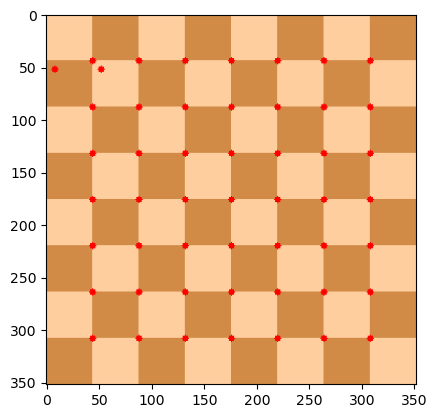

In [37]:
plt.imshow(flat_chess)

In [38]:
corners = cv2.goodFeaturesToTrack(gray_real_chess, 80, 0.04, 10)

In [43]:
corners = np.int8(corners)

In [44]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess, (x,y), 3, (255, 0, 0), -1)

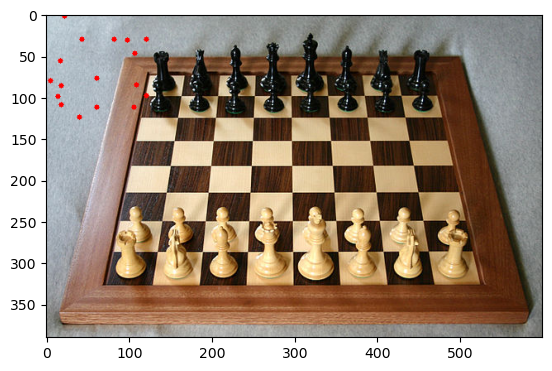

In [45]:
plt.imshow(real_chess)